# Polynomial regression and Cross-validation
Polynomial regression consists of fitting some data(x, y)  to a n-order polynomial
- Let’s start by importing the usual stuff and create a dataset of 16 samples generated using the function _x_ sin _x_ plus some noise:

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Just to avoid the annoying warnings, please ignore
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
 
def create_dataset(N, noise):
    "Creates a dataset of N points generated from x*sin(x) plus some noise."
    
    x = np.linspace(0, 10, 300)
    rng = np.random.default_rng()
    rng.shuffle(x)
    x = np.sort(x[:N])
    print(x)
    
    t = x * np.sin(x) + noise*rng.uniform(-1.0, 1.0, N)
   

    
    return x, t

N = 16
X, t = create_dataset(N, noise=0.2)

[0.86956522 0.90301003 1.10367893 1.17056856 1.90635452 2.47491639
 2.74247492 2.80936455 3.21070234 3.5451505  4.01337793 6.55518395
 6.85618729 7.95986622 7.99331104 8.79598662]


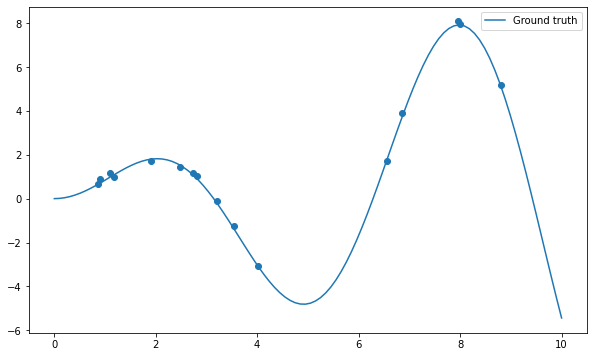

In [8]:
x = np.linspace(0, 10, 100)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.scatter(X, t)
plt.legend()
plt.show()

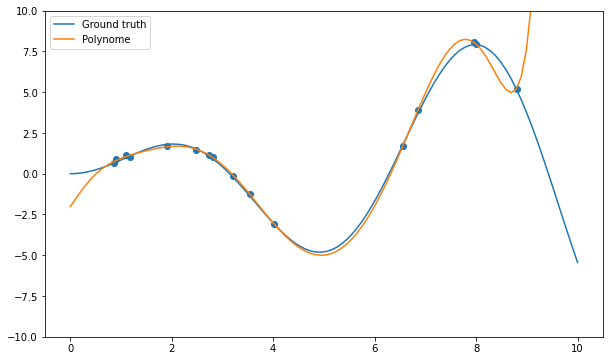

In [20]:
deg = 10

# Polynomial regression
w = np.polyfit(X, t, deg)

# Inference on the training set
y = np.polyval(w, x)

plt.figure(figsize=(10, 6))
plt.plot(x, x*np.sin(x), label="Ground truth")
plt.plot(x, y, label="Polynome")
plt.scatter(X, t)
plt.ylim((-10., 10.))
plt.legend()
plt.show()

__Q:__ Plot the mean square error on the training set for all polynomial regressions from 1 to 20. How does the training error evolve when the degree of the polynomial is increased? What is the risk by taking the hypothesis with the smallest training error?

Degree 1 : empirical error 3.2011557247437734
Degree 2 : empirical error 0.89985476467745
Degree 3 : empirical error 1.062864739072979
Degree 4 : empirical error 0.3173372233323362
Degree 5 : empirical error 0.0689138632985898
Degree 6 : empirical error 0.02245510094895259
Degree 7 : empirical error 0.017313057219970264
Degree 8 : empirical error 0.019184171458302937
Degree 9 : empirical error 0.024091852588766394
Degree 10 : empirical error 0.024708450463708155
Degree 11 : empirical error 0.034772771983909684
Degree 12 : empirical error 0.03343852410911951
Degree 13 : empirical error 0.03248458158838667
Degree 14 : empirical error 0.031815466660210415
Degree 15 : empirical error 0.0313542608074997
Degree 16 : empirical error 0.03104288223177641
Degree 17 : empirical error 0.03083865048326793
Degree 18 : empirical error 0.030710577253509223
Degree 19 : empirical error 0.03063628328669115
Degree 20 : empirical error 0.03059964917654237


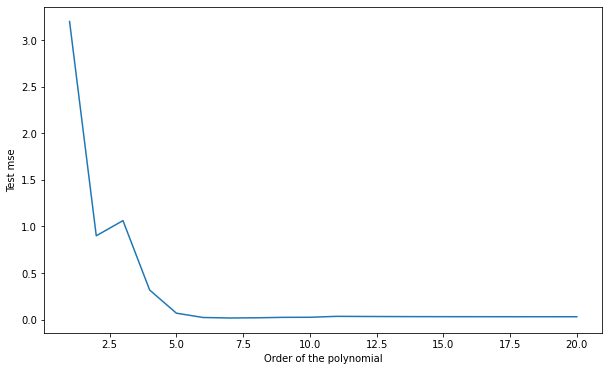

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.2)

degrees = range(1, 21)

test_mse = []

for deg in degrees:
    # Train on the training set
    w = np.polyfit(X_train, t_train, deg)
    
    # Test on the test set
    y_test = np.polyval(w, X_test)
    mse = np.mean((t_test-y_test)**2)
    test_mse.append(mse)
    
    print("Degree", deg, ": empirical error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Test mse")
plt.show()

__A:__ the more complex the model, the smaller the training error.

Apply __simple hold-out cross-validation__ to find the optimal degree for the polynomial regression.

Which degree of the polynomial gives the minimal empirical error? Why? Run the cross-validation split multiple times. Do you always obtain the same optimal degree?

Degree 1 : empirical error 9.11166375674521
Degree 2 : empirical error 4.325132948442931
Degree 3 : empirical error 12.261629084513089
Degree 4 : empirical error 2.8097712022139563
Degree 5 : empirical error 3.569186441541305
Degree 6 : empirical error 1.412992516371951
Degree 7 : empirical error 3.465795394098219
Degree 8 : empirical error 2.2595986037041276
Degree 9 : empirical error 43.58958795326406
Degree 10 : empirical error 205583.43100929577
Degree 11 : empirical error 436296.4834722487
Degree 12 : empirical error 878738.2711676306
Degree 13 : empirical error 1678852.9157230505
Degree 14 : empirical error 3044887.2983049043
Degree 15 : empirical error 5251491.446923852
Degree 16 : empirical error 8633861.549120586
Degree 17 : empirical error 13571044.745392378
Degree 18 : empirical error 20460485.38120956
Degree 19 : empirical error 29688218.53666129
Degree 20 : empirical error 41599916.49873744


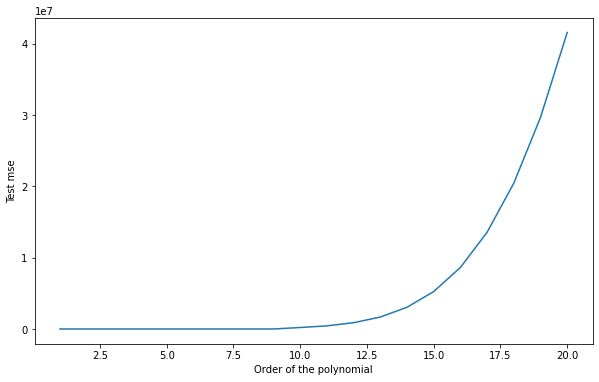

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, t_train, t_test = train_test_split(X, t, test_size=0.3)

degrees = range(1, 21)

test_mse = []

for deg in degrees:
    # Train on the training set
    w = np.polyfit(X_train, t_train, deg)
    
    # Test on the test set
    y_test = np.polyval(w, X_test)
    mse = np.mean((t_test-y_test)**2)
    test_mse.append(mse)
    
    print("Degree", deg, ": empirical error", mse)
    
plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Order of the polynomial")
plt.ylabel("Test mse")
plt.show()

__A:__ depending on the split, the optimal degree is around 6 or 7. This variability is because some samples of the test set might better fit with a given polynomial, depending on how the split was made.

As we only have 16 samples to learn from, it is quite annoying to “lose” 5 of them for the test set. Here we can afford to use __k-fold cross-validation__, where the cross-validation split is performed _k_ times:

In [39]:
from sklearn.model_selection import KFold

k = 4
kf = KFold(n_splits=k, shuffle=True)

In [40]:
for train_index, test_index in kf.split(X, t):
    print("Train:", train_index)
    print("Test:", test_index)
    print('-------')

Train: [ 0  1  2  3  6  7  9 10 11 12 13 14]
Test: [ 4  5  8 15]
-------
Train: [ 0  2  3  4  5  7  8  9 12 13 14 15]
Test: [ 1  6 10 11]
-------
Train: [ 1  2  4  5  6  7  8 10 11 12 14 15]
Test: [ 0  3  9 13]
-------
Train: [ 0  1  3  4  5  6  8  9 10 11 13 15]
Test: [ 2  7 12 14]
-------


1 7.0393965058321815
2 5.8934613728571605
3 9.446911242721711
4 0.8885065893417898
5 7.4584869113254575
6 26.314587972371513
7 2.787959222490959
8 58.26906340667448
9 2517.212296006513
10 232250.90100038663
11 29297472.348767772
12 71901395.34043643
13 166463761.46898913
14 364150111.00822717
15 754297120.0069668
16 1483241402.893164
17 2776841698.191127
18 4965379086.325493
19 8509552033.104342
20 14027425520.89241


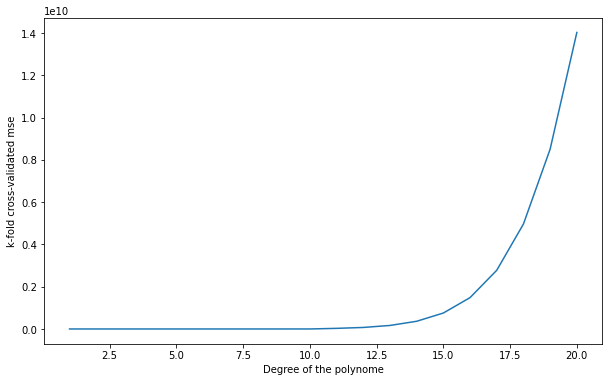

In [56]:
k = 4
kf = KFold(n_splits=k, shuffle=True)

degrees = range(1, 21)

test_mse = []

for train_index, test_index in kf.split(X, t):
    
    split_mse = []
    
    for deg in degrees:
        
        w = np.polyfit(X[train_index], t[train_index], deg)
        y = np.polyval(w, X[test_index])
        
        mse = np.mean((t[test_index] - y)**2)
        split_mse.append(mse)
    
    test_mse.append(split_mse)
        
test_mse = np.mean(test_mse, axis=0)

for deg, mse in zip(degrees, test_mse):
    print(deg, mse)

plt.figure(figsize=(10, 6))
plt.plot(degrees, test_mse)
plt.xlabel("Degree of the polynome")
plt.ylabel("k-fold cross-validated mse")
plt.show()

__A:__ a polynomial of order between 6 and 7 still seems the best, but it varies from run to run (as well as on the data, you may observe something different).